In [1]:
import pandas as pd

In [89]:
from vncorenlp import VnCoreNLP
annotator = VnCoreNLP("./VnCoreNLP-master/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

In [73]:
df = pd.read_csv('./data/data_clean_v4.csv').drop('Unnamed: 0', axis=1)
df.head()

,index,NewsId,Ticker,NewsTitle,NewsFullContent,PublicDate,len,word_len
0,0,1441,VCB,VCB ký hợp đồng vay vốn 100 triệu USD,Ông Nguyễn Hòa Bình Chủ tịch HĐQT của VCB cho ...,2008-10-20 00:00:00,1054,8
1,1,4086,STB,"Kết thúc Phiên 1, 30/10: STB và PPC đang &quot...",Trong khi thị trường Châu Âu có phiên tăng điể...,2008-10-30 10:08:00,2550,8
2,2,19833,PNJ,"Ngày 23/3, Hose đón tân binh PNJ",Kế hoạch này đã được đại diện PNJ bà Cao Thị N...,2009-03-03 11:29:00,1941,8
3,3,25591,FPT,Sắp khởi công Đại học FPT,Theo đó tháng 7/2009 Đại học FPT sẽ chính thức...,2009-06-02 14:29:00,1255,6
4,4,26019,SSI,SSI đứng đầu thị phần môi giới cổ phiếu,Trong khi chỉ có 5 công ty nắm tới trên 30 ngh...,2009-06-09 17:13:00,1158,6


In [74]:
dic = pd.read_csv('./data/fullTranslated.csv')['words'].values
len(dic)

23523

In [75]:
def word_segment(text):
    annotated_text = annotator.annotate(text)['sentences'][0]
    return [dic['form'].replace('_',' ') for dic in annotated_text] 

In [76]:
df['word_segment'] = df['NewsFullContent'].apply(lambda text: word_segment(text))

In [77]:
def tag(word, dic):
    if word in dic:
        return 1
    else:
        return 0

def label(text, dic):
    keywords = set(text).intersection(dic)
    text_df = pd.DataFrame(text)
    text_df.columns = ['word']

    text_df['tag'] = text_df['word'].apply(lambda x: tag(x, keywords))
    
#     return list(zip(text_df['word'], text_df['tag']))
    return sum(text_df['tag']), list(zip(text_df['word'], text_df['tag']))

In [78]:
df['filtered'] = df['word_segment'].apply(lambda text: label(text, dic))

In [79]:
df['match'], df['label'] = zip(*df.filtered.values)

C:\Users\anhdq33\Anaconda3\envs\keyword_extract\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


C:\Users\anhdq33\Anaconda3\envs\keyword_extract\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


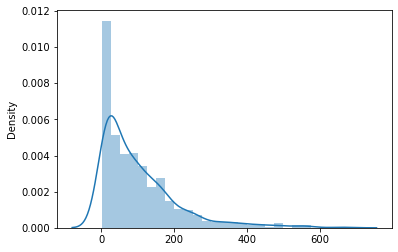

In [81]:
sns.distplot(df['match'].values)

In [91]:
df[df['match'] > 30][['NewsTitle','NewsFullContent','label']].to_csv('./data/data_labeled.csv')

In [90]:
df[df['match'] > 30][['NewsTitle','NewsFullContent','label']]

,NewsTitle,NewsFullContent,label
0,VCB ký hợp đồng vay vốn 100 triệu USD,Ông Nguyễn Hòa Bình Chủ tịch HĐQT của VCB cho ...,"[(Ông, 0), (Nguyễn Hoà Bình Chủ tịch, 0), (HĐQ..."
1,"Kết thúc Phiên 1, 30/10: STB và PPC đang &quot...",Trong khi thị trường Châu Âu có phiên tăng điể...,"[(Trong, 0), (khi, 0), (thị trường, 1), (Châu ..."
2,"Ngày 23/3, Hose đón tân binh PNJ",Kế hoạch này đã được đại diện PNJ bà Cao Thị N...,"[(Kế hoạch, 0), (này, 0), (đã, 1), (được, 1), ..."
3,Sắp khởi công Đại học FPT,Theo đó tháng 7/2009 Đại học FPT sẽ chính thức...,"[(Theo, 0), (đó, 0), (tháng, 1), (7/2009, 0), ..."
4,SSI đứng đầu thị phần môi giới cổ phiếu,Trong khi chỉ có 5 công ty nắm tới trên 30 ngh...,"[(Trong, 0), (khi, 0), (chỉ, 1), (có, 1), (5, ..."
...,...,...,...
925,Liên danh FPT Quy Nhơn trúng thầu dự án hơn 4....,Ông Nguyễn Phi Long PCT UBND tỉnh Bình Định vừ...,"[(Ông, 0), (Nguyễn Phi Long PCT, 0), (UBND, 0)..."
926,Liên danh FPT Quy Nhơn trúng thầu dự án hơn 4....,Ông Nguyễn Phi Long PCT UBND tỉnh Bình Định vừ...,"[(Ông, 0), (Nguyễn Phi Long PCT, 0), (UBND, 0)..."
927,"PNJ phát hành 2,3 triệu cổ phiếu ESOP, Chủ tịc...",Giá phát hành dự kiến là 20 000 đồng/cp thấp...,"[(Giá, 0), (phát hành, 1), (dự kiến, 1), (là, ..."
928,"Vingroup nêu phương án quy hoạch khu đô thị, s...",Đại diện UBND Bắc Giang đóng góp ý kiến thiế...,"[(Đại diện, 0), (UBND, 0), (Bắc Giang, 0), (đó..."


In [87]:
df[df['match'] > 30].loc[0,'label']

[('Ông', 0),
 ('Nguyễn Hoà Bình Chủ tịch', 0),
 ('HĐQT', 0),
 ('của', 1),
 ('VCB', 0),
 ('cho', 1),
 ('biết', 1),
 ('khoản', 0),
 ('vay', 1),
 ('trong', 1),
 ('3', 0),
 ('năm', 1),
 ('này', 0),
 ('sẽ', 1),
 ('góp phần', 0),
 ('bổ sung', 1),
 ('nguồn', 1),
 ('vốn', 0),
 ('ngoại tệ', 0),
 ('trung hạn', 0),
 ('đáng kể', 1),
 ('phục vụ', 1),
 ('cho', 1),
 ('các', 0),
 ('mục tiêu', 1),
 ('kinh doanh', 1),
 ('và', 1),
 ('tăng trưởng', 1),
 ('của', 1),
 ('ngân hàng', 1),
 ('Hiện tại', 0),
 ('tổng', 0),
 ('nguồn', 1),
 ('vốn', 0),
 ('của', 1),
 ('VCB', 0),
 ('đạt', 0),
 ('203', 0),
 ('ngàn', 0),
 ('tỷ', 1),
 ('đồng', 1),
 ('tăng', 1),
 ('6', 0),
 ('000', 0),
 ('tỷ', 1),
 ('đồng', 1),
 ('so', 0),
 ('với', 1),
 ('cuối', 0),
 ('năm', 1),
 ('2007', 0),
 (';', 0),
 ('trong', 1),
 ('đó', 0),
 ('nguồn', 1),
 ('vốn', 0),
 ('ngoại tệ', 0),
 ('là', 1),
 ('5', 0),
 ('3', 0),
 ('tỷ', 1),
 ('USD', 0),
 ('Vì vậy', 0),
 ('nếu', 0),
 ('so', 0),
 ('với', 1),
 ('tổng', 0),
 ('nguồn', 1),
 ('vốn', 0),
 ('ngoại t